In [1]:
%matplotlib inline


# OT mapping estimation for domain adaptation


This example presents how to use MappingTransport to estimate at the same
time both the coupling transport and approximate the transport map with either
a linear or a kernelized mapping as introduced in [8].

[8] M. Perrot, N. Courty, R. Flamary, A. Habrard,
    "Mapping estimation for discrete optimal transport",
    Neural Information Processing Systems (NIPS), 2016.



In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot

Generate data
-------------



In [3]:
n_source_samples = 100
n_target_samples = 100
theta = 2 * np.pi / 20
noise_level = 0.1

Xs, ys = ot.datasets.get_data_classif(
    'gaussrot', n_source_samples, nz=noise_level)
Xs_new, _ = ot.datasets.get_data_classif(
    'gaussrot', n_source_samples, nz=noise_level)
Xt, yt = ot.datasets.get_data_classif(
    'gaussrot', n_target_samples, theta=theta, nz=noise_level)

# one of the target mode changes its variance (no linear mapping)
Xt[yt == 2] *= 3
Xt = Xt + 4

Plot data
---------



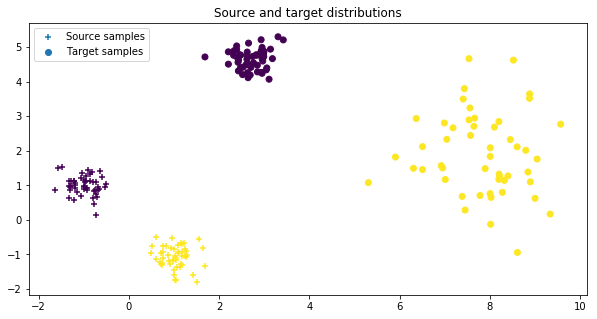

In [4]:
pl.figure(1, (10, 5))
pl.clf()
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



In [5]:
# MappingTransport with linear kernel
ot_mapping_linear = ot.da.MappingTransport(
    kernel="linear", mu=1e0, eta=1e-8, bias=True,
    max_iter=20, verbose=True)

ot_mapping_linear.fit(Xs=Xs, Xt=Xt)

# for original source samples, transform applies barycentric mapping
transp_Xs_linear = ot_mapping_linear.transform(Xs=Xs)

# for out of source samples, transform applies the linear mapping
transp_Xs_linear_new = ot_mapping_linear.transform(Xs=Xs_new)


# MappingTransport with gaussian kernel
ot_mapping_gaussian = ot.da.MappingTransport(
    kernel="gaussian", eta=1e-5, mu=1e-1, bias=True, sigma=1,
    max_iter=10, verbose=True)
ot_mapping_gaussian.fit(Xs=Xs, Xt=Xt)

# for original source samples, transform applies barycentric mapping
transp_Xs_gaussian = ot_mapping_gaussian.transform(Xs=Xs)

# for out of source samples, transform applies the gaussian mapping
transp_Xs_gaussian_new = ot_mapping_gaussian.transform(Xs=Xs_new)

It.  |Loss        |Delta loss
--------------------------------
    0|4.210546e+03|0.000000e+00
    1|4.194392e+03|-3.836611e-03
    2|4.194053e+03|-8.094371e-05
    3|4.193924e+03|-3.056965e-05
    4|4.193849e+03|-1.797118e-05
    5|4.193801e+03|-1.140070e-05
    6|4.193776e+03|-5.930168e-06
It.  |Loss        |Delta loss
--------------------------------
    0|4.245881e+02|0.000000e+00
    1|4.181680e+02|-1.512078e-02
    2|4.178974e+02|-6.472597e-04
    3|4.177550e+02|-3.406786e-04
    4|4.176586e+02|-2.307406e-04
    5|4.175879e+02|-1.692203e-04
    6|4.175338e+02|-1.295518e-04
    7|4.174909e+02|-1.028089e-04
    8|4.174570e+02|-8.123852e-05
    9|4.174309e+02|-6.257777e-05
   10|4.174083e+02|-5.401101e-05


Plot transported samples
------------------------



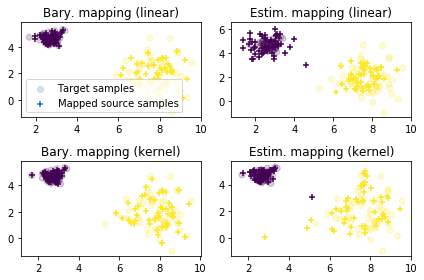

In [6]:
pl.figure(2)
pl.clf()
pl.subplot(2, 2, 1)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_linear[:, 0], transp_Xs_linear[:, 1], c=ys, marker='+',
           label='Mapped source samples')
pl.title("Bary. mapping (linear)")
pl.legend(loc=0)

pl.subplot(2, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_linear_new[:, 0], transp_Xs_linear_new[:, 1],
           c=ys, marker='+', label='Learned mapping')
pl.title("Estim. mapping (linear)")

pl.subplot(2, 2, 3)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_gaussian[:, 0], transp_Xs_gaussian[:, 1], c=ys,
           marker='+', label='barycentric mapping')
pl.title("Bary. mapping (kernel)")

pl.subplot(2, 2, 4)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_gaussian_new[:, 0], transp_Xs_gaussian_new[:, 1], c=ys,
           marker='+', label='Learned mapping')
pl.title("Estim. mapping (kernel)")
pl.tight_layout()

pl.show()